# Enhancing Corporate Liquidity Advisory with Machine Learning

### Introduction:

As an investment banking analyst, providing accurate and data-driven insights to corporate treasurers and CFOs is critical when advising on liquidity management. Traditionally, our team has relied on simple linear regression models to benchmark a company’s liquidity against its peers. However, these models often fail to capture the complex financial patterns that influence liquidity decisions.

In this project, we develop a machine learning algorithm to improve upon the existing analysis, leveraging advanced predictive techniques to provide more precise and actionable recommendations. By incorporating a broader range of financial indicators and applying more sophisticated modeling approaches, we aim to deliver a more robust, data-driven framework for corporate liquidity advisory.

### 1. Data Exploration

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [37]:
# Import train_test_split() from Scikit Learn's model_selection module

from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv('/Users/keithrobinson/Desktop/PyFI/ML 03. Module Files/liquidity_data.csv')

In [39]:
df.head(3)

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,28694.04271,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0
1,24784.00051,7,209150.6401,57909.0,-2021.0,15161.00019,12105.0,37727.0
2,24142.00013,6,180108.3453,32970.0,-1817.0,15818.99981,12604.0,192592.0


In [40]:
df.describe()

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
count,802.000000,802.000000,802.000000,802.000000,802.00000,802.000000,802.000000,802.000000
mean,3884.952199,3.017456,41645.089870,9040.720589,-1200.91799,3455.752891,1772.335973,20420.383638
std,4267.893247,1.851461,74046.522440,12112.161513,2066.29159,5679.466199,4207.345101,39483.422972
min,267.000000,0.000000,4282.810112,0.000000,-15858.00000,-6530.000000,-4888.000000,503.586000
25%,1288.328992,2.000000,10082.091010,2125.297000,-1241.00000,936.200000,232.923000,3791.525000
50%,2395.700000,3.000000,19349.403650,4562.000000,-512.00000,1695.700032,682.110000,8587.166000
75%,4512.458596,4.000000,41154.826240,10478.000000,-190.00000,3706.000000,1788.000000,18816.000000
max,28694.042710,10.000000,777070.706700,87032.000000,-5.04900,69715.000320,53244.000000,487511.000000


### 2. Splitting Data

In [41]:
# Define a Series named "target" containing only the target variable
target = df['available_liquidity']

# Define a DataFrame named "inputs" containing only the input features
inputs = df.drop('available_liquidity', axis=1)


In [42]:
# Display the first row of target
target.head(1)


0    28694.04271
Name: available_liquidity, dtype: float64

In [43]:
# Display the first row of inputs
inputs.head(1)


,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0


In [44]:
# Split your data and pass the results to a new object named "results"
results = train_test_split(inputs, target, test_size=0.2, random_state=1)


In [45]:
# Print the type() and len() of results
print(type(results))
print(len(results))

# For each item in results, print the item's dimensions
print('---')
for i in results:
    print(i.shape)


<class 'list'>
4
---
(641, 7)
(161, 7)
(641,)
(161,)


In [46]:
input_train, input_test, target_train, target_test = results
print(input_train.shape)
print(input_test.shape)
print(target_train.shape)
print(target_test.shape)

(641, 7)
(161, 7)
(641,)
(161,)


In [47]:
input_train.head()

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
309,3,16764.94643,1887.019,-483.002,1905.832960,859.710,8653.205
433,2,80925.58950,21363.000,-3738.000,6494.000128,2164.000,50685.000
594,4,40546.65626,4807.000,-266.000,3156.000000,1923.000,13378.000
108,6,60684.02586,3888.000,-389.000,4738.999936,1865.000,31070.000
799,3,10305.69062,0.000,-42.868,302.445000,71.567,838.977


In [48]:
input_test.head(1)

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
8,8,172479.4798,24842.0,-1674.0,10841.00006,6830.0,39929.0


In [49]:
target_train.head(1)

309    1227.539
Name: available_liquidity, dtype: float64

In [50]:
target_test.head(1)

8    17708.00026
Name: available_liquidity, dtype: float64

### 3. Model Pipelines

In [51]:
# Import required functions from Scikit-Learn
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create pipelines dictionary with model pipelines for Lasso and Ridge
pipelines = {
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=1)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=1))
}


In [52]:
# Add pipeline for Elastic Net
from sklearn.linear_model import ElasticNet

pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state=1))


In [53]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=1))
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=1))

In [54]:
# Run this cell to verify that all 5 pipelines are properly defined
for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


### 4. Hyperparameter Tuning

In [55]:
# Create a hyperparameter grid for Lasso
lasso_hyperparameters = {
    'lasso__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}


In [56]:
# Create a hyperparameter grid for Ridge
ridge_hyperparameters = {
    'ridge__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}

# Create a hyperparameter grid for Elastic Net
enet_hyperparameters = {
    'elasticnet__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]

}


In [57]:
# Create a hyperparameter grid for Random Forest
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 0.3, 0.6]
}

# Create a hyperparameter grid for Gradient Booster
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3 , 5]
}


In [58]:
# Create the hyperparameter_grids dictionary
hyperparameter_grids = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}


In [59]:
# Run the code below to make sure everything is set up correctly
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameter_grids:
        if type(hyperparameter_grids[key]) is dict:
            print( key, 'was found, and it is a grid.' )
        else:
            print( key, 'was found, but it is not a grid.' )
    else:
        print( key, 'was not found')

enet was found, and it is a grid.
gb was found, and it is a grid.
ridge was found, and it is a grid.
rf was found, and it is a grid.
lasso was found, and it is a grid.


### 5. Cross Validation

In [60]:
# Import GridSearchCV

from sklearn.model_selection import GridSearchCV

untrained_lasso_model = GridSearchCV(pipelines['lasso'], hyperparameter_grids['lasso'], cv=5)

In [61]:
print(pipelines.keys())
print('---')
print(hyperparameter_grids.keys())

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])
---
dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])


In [62]:
models = {}

for key in pipelines.keys():
    models[key] = GridSearchCV(pipelines[key], hyperparameter_grids[key], cv=5)


models.keys()

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])

In [63]:
models['lasso'].fit(input_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=1))]),
             param_grid={'lasso__alpha': [0.01, 0.05, 0.1, 0.5, 1, 5]})

In [64]:
for key in models.keys():
    models[key].fit(input_train, target_train)
    print(key, 'is trained and tuned')

lasso is trained and tuned
ridge is trained and tuned
enet is trained and tuned


/opt/anaconda3/envs/python311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/python311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/python311/lib/python3.11/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/python311/lib/python3.11/site-packages/skle

rf is trained and tuned
gb is trained and tuned


### 6. Selecting a Winning Model

In [65]:
# Import the r-squared and mean absolute error metrics
from sklearn.metrics import r2_score, mean_absolute_error


In [69]:
for key in models:
    preds = models[key].predict(input_test)
    print(key)
    print('R-Squared:' , round(r2_score(target_test, preds), 3))
    print('MAE: ', round(mean_absolute_error(target_test, preds), 3))
    print('RMSE: ', round(np.sqrt(mean_absolute_error(target_test, preds)), 3))
    print('---')

lasso
R-Squared: 0.498
MAE:  1710.083
RMSE:  41.353
---
ridge
R-Squared: 0.5
MAE:  1708.062
RMSE:  41.329
---
enet
R-Squared: 0.501
MAE:  1706.04
RMSE:  41.304
---
rf
R-Squared: 0.846
MAE:  947.077
RMSE:  30.775
---
gb
R-Squared: 0.886
MAE:  515.325
RMSE:  22.701
---


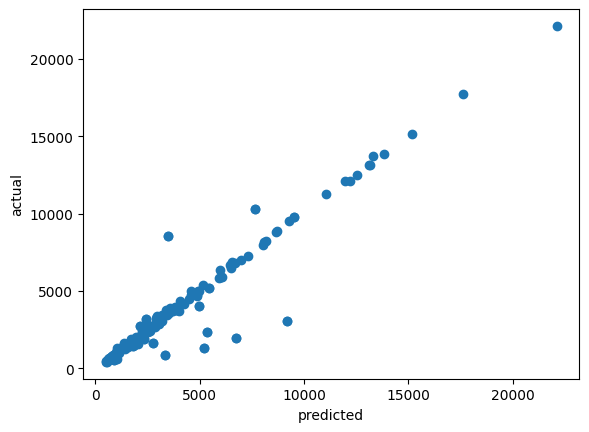

In [67]:
# Make prediction with test data
preds = models['gb'].predict(input_test)

# Plot predictions on x axis and actuals on y axis
plt.scatter(preds, target_test)

# Label axes and show graph
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()



In [75]:
client = pd.read_csv('/Users/keithrobinson/Desktop/PyFI/ML 03. Module Files/liquidity_client.csv')
models['gb'].predict(client)

array([28673.37496513, 13847.05124622, 13702.49048305, 13288.77808734,
       13164.10583816, 13143.34487566, 13106.36340421, 13142.03279421])

### Conclusion

In this project, we developed a machine learning model to enhance corporate liquidity advisory, improving upon traditional linear regression-based analysis. By leveraging multiple algorithms—including Lasso, Ridge, Elastic Net, Random Forest, and Gradient Boosting—we aimed to identify the best predictive approach for benchmarking corporate liquidity against peer companies.

Our results indicate that Gradient Boosting (GB) significantly outperforms all other models, achieving the highest R-Squared (0.886) and the lowest Mean Absolute Error (MAE: 515.325) and Root Mean Squared Error (RMSE: 22.701). This suggests that Gradient Boosting provides the most accurate liquidity predictions, offering CFOs and treasurers a more reliable tool for financial decision-making.

Beyond improving accuracy, this machine learning approach enables corporations to better optimize liquidity management, reduce financial risk, and make data-driven capital allocation decisions. Future enhancements could involve incorporating additional financial indicators, further hyperparameter tuning, or experimenting with deep learning models to refine predictions.

By replacing traditional regression analysis with advanced machine learning techniques, this project sets the foundation for more sophisticated, data-driven liquidity advisory in investment banking.